![DBIS Informatik 5 - Informationssysteme und Datenbank](https://dbis.rwth-aachen.de/dbis/wp-content/uploads/2022/04/dbis-logo.png)

<div class="pull-left">

Prof. Dr. Stefan Decker <br>
M. Slupczynski, L. Neumann, M. Kißgen

</div>

<div class="pull-right">

#### WiSe 2024

</div>

<!-- omit in toc -->
# Einführung in das Entity-Relationship-Modell, ER-Malwerkzeug
In der Vorlesung haben Sie das Relationale Datenmodell kennengelernt. ER-Diagramme bieten ein Modell zur Darstellung von Entitäten und deren Relationen.

Dieses Blatt gibt einen kurzen Überblick über die Elemente des Entity-Relationship-Modells (ER-Modell) und eine Einführung in ein von uns entwickeltes Python-tool, welches euch das digitale Zeichnen von ER-Diagrammen erleichtern soll. 

Im DBIS Image des Jupyter Hub der RWTH ist dieses Package bereits integriert, falls Sie die ER Diagrammme lokal benutzen möchten, können Sie diese über den folgenden Befehl installieren:

In [3]:
%pip install dbis-er-diagram~=1.0.3

Note: you may need to restart the kernel to use updated packages.


Die folgende Zelle importiert das Python Modul und ermöglicht dessen Nutzung innerhalb des Notebooks:

In [4]:
from erdiagram import ER

## Entities
> Neue Entität zum Graphen hinzufügen: `add_entity()`

**Entities** sind Objekte - konkrete oder abstrakte Gegenstände oder Wesen, welche sich von anderen Entities unterscheiden. Beispiele hierfür sind *Person, Auto, Kunde, Buch, etc.*  
**Entity-Typen** sind Mengen von Entities, welche die gleichen Attribute besitzen. Beispiele für Entity-Typen sind *Personen, Autos, Kunden, etc.*  
Entity-Typen werden in ER-Diagrammen durch Rechtecke dargestellt.  
Der Befehl um einen Entity-Typen zum Diagramm hinzuzufügen ist ```add_entity("Entity Name")```

``` python .noeval
g.add_entity(label, is_weak = False)
``` 

#### Funktionsparameter
- `label(str)`: Knotenbezeichnung
- `is_weak(bool)`: Ist dies ein schwacher Knoten?

#### Beispiel

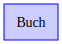

In [5]:
# Initialisiere ein neues ER-Diagramm und speichere die Referenz in der Variable g
g = ER()

# Füge einen neuen Knoten mit dem Namen Buch hinzu
g.add_entity("Buch")

# Zeichne das Diagramm
g.display()

---

## Attribute und Schlüssel
> Neues Attribut zu einer Entität im Graphen hinzufügen `add_attribute()`

Alle Mitglieder eines Entity-Typs werden durch eine Menge charakterisierender **Eigenschaften (Attributes)** beschrieben. Beispiele hierfür sind *Farbe, Gewicht und Preis* beim Entity-Typ *Teile*.  Die Werte eines Attributes stammen normalerweise aus Wertebereichen wie ```INTEGER```, ```REAL```, ```STRING```, etc. aber auch strukturierte Werte wie Listen, Bäume, usw. sind vorstellbar.  

Ein **Schlüssel** ist eine minimale Menge von Attributen, deren Werte das zugeordnete Entity eindeutig innerhalb aller Entities seines Typs identifiziert.  
Attribute werden im ER-Diagramm durch Ellipsen dargestellt:
- Attribute sind über ungerichtete Kanten mit dem zugehörigen Entity-Typ verbunden.
- Schlüssel-Attribute (_primary key_) werden (in der Regel) unterstrichen.

Der Befehl um ein Attribut zu einem Entity-Typen hinzuzufügen ist ```add_attribute("Entity-Type name", "Attribute name")```.  
Um ein Attribut als Schlüssel-Attribut zu kennzeichnen, muss außerdem der Parameter ```is_pk``` auf ```True``` gesetzt werden.

``` python .noeval
g.add_attribute( parent_label, attribute_label,
                 is_pk = False, is_multiple = False,
                 is_weak = False, composed_of = [])
``` 

#### Funktionsparameter
- `parent_label(str)`: Bezeichnung des übergeordneten Knotens
- `attribute_label(str)`: Bezeichnung des Attributs
- `is_pk(bool)`: Ist dieses Attribut der Primärschlüssel?
- `is_multiple(bool)`: Ist die Kardinalität des Knotens mehrfach oder singulär?
- `is_weak(bool)`: (Nur für key-Attribute) Ist dieses Attribut Teil einer schwachen Entität?
- `composed_of(list)`: Liste der Attribute, aus denen sich dieses Attribut zusammensetzt

#### Beispiel

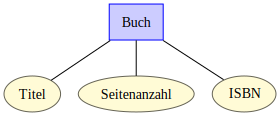

In [6]:
g = ER()
g.add_entity("Buch")

# Attribute hinzufügen
g.add_attribute("Buch", "Titel")
g.add_attribute("Buch", "Seitenanzahl")

# Die ISBN beschreibt ein Buch eindeutig und ist daher ein Schlüssel-Attribut
g.add_attribute("Buch", "ISBN", is_pk=True)
g.display()

---

### Zusammengesetzte Attribute

Ein Attribut kann aus anderen Attributen bestehen. Ein Beispiel hierfür ist eine Addresse, welche aus Straße + Hausnummer, Postleitzahl und Ort besteht.  
Unterattribute werden mit ungerichteten Kanten mit dem zusammengesetzten Attribut verbunden.
Um ein zusammengetztes Attribut zu erstellen muss beim Erstellen des Attributs eine Liste von Unterattributen als Parameter ```composed_of``` übergeben werden.

#### Beispiel
_Eine Adresse besteht aus einer Straße + Hausnummer, einer PLZ und einem Ort._

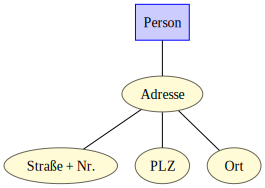

In [7]:
g = ER()
g.add_entity("Person")

g.add_attribute("Person", "Adresse", 
                composed_of=["Straße + Nr.", "PLZ", "Ort"])
g.display()

---


### Mehrwertige Attribute

Ein (mehrwertiges) Attribut kann eine Menge von Werten enthalten. Ein Beispiel hierfür ist das Autor Attribut des Entity-Typ Buch, da ein Buch von mehreren Autoren geschrieben sein kann.  
Ein mehrwertiges Attribut wird als Ellipse mit doppelter Umrandung dargestellt.  
Um ein Attribut als mehrwertig zu kennzeichnen, muss der Parameter ```is_multiple``` auf wahr gesetzt werden.

#### Beispiel
_Ein Buch kann von mehreren Autoren geschrieben werden._  
_Natürlich nehmen wir in diesem Beispiel an, dass "Autor" keine Entität ist, sondern lediglich ein Attribut der Entität "Buch"._

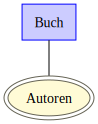

In [8]:
g = ER()
g.add_entity("Buch")
g.add_attribute("Buch", "Autoren", is_multiple=True)
g.display()

---

## Beziehungen / Relationen zwischen Entity-Typen
> Neue Beziehung (=Relation) zwischen zwei Entitäten hinzufügen `add_relation()`

Oft stehen zwei oder mehr Entity-Typen in Beziehung zueinander. Beziehungen werden im ER-Diagramm durch Rauten dargestellt und können ebenfalls Attribute haben. 

Für die Kardinalitätsrestriktionen wurden in der Vorlesung zwei Notationen vorgestellt: die `1:n-Notation` und die `(min,max)-Notation`.  
Hierdurch können zusätzlich zur dargestellten Relation Kardinalitäten angegeben werden um darzustellen, in welcher Anzahl die Entitäten des einen Entity-Typen mit welcher Anzahl von Entitäten des anderen Entity-Typen in Beziehung stehen. 
Diese Kardinalitäten werden im ER-Diagramm an die Kanten zwischen Entity-Typ und Relation geschrieben. 

Der Befehl um eine Beziehung hinzuzufügen ist ```add_relation({"From Entity-Type": "n"}, "Relation label", {"To Entity-Type": "m"})```.

``` python .noeval
g.add_relation(from_entities, relation_label, to_entities)
``` 

#### Funktionsparameter
- `from_entities(dict[str, int | str | dict[str, int | str]])`: Bezeichnung und Kardinalität des "from"-Knotens
- `relation_label(str)`: Label der Relation
- `to_entities(dict[str, int | str | dict[str, int | str]])`: Bezeichnung und Kardinalität des "to"-Knotens

#### Beispiel
_Mehrere Patienten besuchen mehrere Ärzte. Zu jedem Besuch wird ein Datum gespeichert._

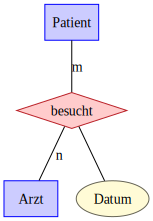

In [9]:
g = ER()
g.add_entity("Arzt")
g.add_entity("Patient")
g.add_relation({"Patient": "m"}, "besucht", {"Arzt": "n"})
g.add_attribute("besucht", "Datum")
g.display()

---

### N-stellige Beziehungen

Es können auch drei oder mehr Entity-Typen in Beziehung zueinander stehen.  
Um weitere Entity-Typen einer Beziehung hinzuzufügen, muss in Kauf genommen werden, dass einige Kanten möglicherweise mehrmals gezeichnet werden (beispielsweise die Kante "prüft").

#### Beispiel
_Ein Professor prüft einen Studenten über eine Vorlesung._

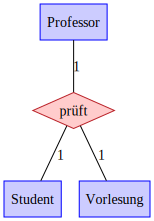

In [10]:
g = ER()
g.add_entity("Student")
g.add_entity("Vorlesung")
g.add_entity("Professor")
g.add_relation({"Professor":1},
    "prüft",
    {
        "Student":1,
        "Vorlesung":1
    })
g.display()

---

### Schwache Entity-Typen
Ein schwacher Entity-Typ ist von der Existenz des übergeordneten Entity-Typs abhängig.  

Schwache Entitätstypen werden im ER-Diagramm durch einen doppelten Rahmen um die Beziehung und eine doppelte Kante zwischen dem Beziehungsknoten, dem Entitätsknoten und der schwachen Entität gekennzeichnet. Außerdem werden die Schlüssel von schwachen Entity-Typen gestrichelt unterstrichen.  
Hierzu muss in allen drei Befehlen (```add_entity```,```add_relation```, ```add_attribute```) der Parameter ```is_weak``` auf ```True``` gesetzt werden.

#### Beispiel
_Ohne Hörsaalgebäude kann es keine Seminarräume geben._

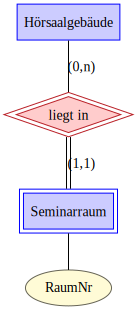

In [11]:
g = ER()
g.add_entity("Hörsaalgebäude")
g.add_entity("Seminarraum", is_weak=True) # Schwacher Entitätstyp
g.add_relation(
    {
        "Hörsaalgebäude": "(0,n)"
    },
    "liegt in",
    {
        "Seminarraum": {
            "cardinality": "(1,1)",
            "is_weak":True # Hier wird die Relation schwach angebunden
        }
    }
)
g.add_attribute("Seminarraum", "RaumNr", is_pk=True, is_weak=True) # Schwaches Attribut
g.display()

---

## Generalisierung/Spezialisierung ("ist-ein" bzw. "is a")

Es kann Vererbungsbeziehungen (isA) zwischen Entity-Typen und spezialisierten Entity-Typen geben. Diese werden im ER-Diagramm als umgedrehte Dreiecke mit einer ungerichteten Kante zum allgemeinen Entity-Typen und einer oder mehreren gerichteten Kanten zu den spezialisierten Entity-Typen dargestellt. 

Es gibt unterschiedliche Formen dieser Vererbungsbeziehungen:
- **Disjunkt**
  - Spezialisierungen sind disjunkt (ein Angestellter kann nicht Assistent und Professor sein)
  - Pfeile zeigen in Richtung der Spezialisierung
- **Nicht disjunkt**
  - Spezialisierungen sind nicht disjunkt (Eine Person kann Angestellter und Student sein)
  - Pfeile Zeigen in Richtung der Generalisierung
- **Total (t)**
  - Die Dekomposition der Generalisierung ist vollständig (Es gibt entweder wissenschaftliche oder nicht wissenschaftliche Mitarbeiter)
  - Wird durch “t” neben der isA Beziehung dargestellt
- **Partiell (p)**
  - Die Vereinigung der Spezialisierung ist eine echte Untermenge der Generalisierung
  - Wird durch “p” neben der isA Beziehung dargestellt
 
Der Befehl um eine isA Beziehung zum ER-Diagramm hinzuzufügen ist ```add_is_a("Generalisation", ["Specialisation1","Specialisation2"], is_total=True/False, is_disjunct=True/False)```

``` python .noeval
g.add_is_a(super_class_label, sub_class_labels,
           is_total, is_disjunct)
```

#### Funktionsparameter
- `super_class_label(str)`: Bezeichnung des Oberklassenknotens  (_"parent"/"superclass"_)
- `sub_class_labels(str | list[str])`: Label des/der Unterklassenknoten(s) (_"child"/"subclass"_)
- `is_total(bool)`: Ist die Zerlegung total oder partiell?
- `is_disjunct(bool)`: Sind die Elemente dieser Relation disjunkt?

#### Beispiel

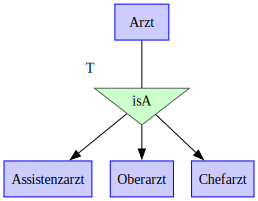

In [12]:
g = ER()
g.add_entity("Arzt")
g.add_entity("Assistenzarzt")
g.add_entity("Oberarzt")
g.add_entity("Chefarzt")
g.add_is_a("Arzt", ["Assistenzarzt", "Oberarzt", "Chefarzt"], is_total=True, is_disjunct=True)
g.display()

## ER und Relationales Datenmodell

### Entität mit Attributen
Der folgende Code erstellt die Relation
- Student(<u>MatrNr</u>, Name, Semester, Adresse)

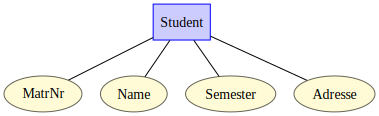

In [13]:
g = ER()

g.add_entity('Student') 

g.add_attribute('Student', 'MatrNr', is_pk = True)
g.add_attribute('Student', 'Name')
g.add_attribute('Student', 'Semester')

g.add_attribute('Student', "Adresse")

g.display()

### Beziehungen zwischen Entitäten
Der folgende Code erstellt folgende...
#### ...Entitäten:
- Student(<u>MatrNr</u>)
- Vorlesung(<u>VorlNr</u>)
- Hört(<u>MatrNr</u>, <u>VorlNr</u>)
#### ...Interrelationale Abhängigkeiten:
- Hört[MatrNr] $\subseteq$ Student[MatrNr]
- Hört[VorlNr] $\subseteq$ Vorlesung[VorlNr]

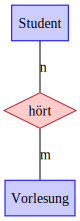

In [14]:
g = ER()

g.add_entity('Student')
#g.add_attribute('Student', 'MatrNr', is_pk = True)

g.add_entity('Vorlesung')
#g.add_attribute('Vorlesung', 'VorlNr', is_pk = True)

g.add_relation({'Student':'n'}, 'hört', {'Vorlesung':'m'})

g.display()

### Generalisierung / Spezialisierung (partielle Beziehung)

Der folgende Code erstellt folgende...

#### ...Entitäten:
- Angestellter(<u>PersNr</u>, Name)
- Professor(<u>PersNr</u>, Rang, Raum)
- Assistent(<u>PersNr</u>, Fachgebiet)

#### ...Interrelationale Abhängigkeiten:
- Professor[PersNr] $\subseteq$ Angestellter[PersNr]
- Assistent[PersNr] $\subseteq$ Angestellter[PersNr]

#### ...Partielle Beziehung:
- Professor[PersNr] $\cap$ Assistent[PersNr] = $\emptyset$

Professor und Assistent sind disjunkt *(ein Assistent kann **nicht** Professor sein).*  
Die Unterscheidung zwischen "total" und "partiell" wird *(manuell)* durch den Parameter `super_label` gesteuert.

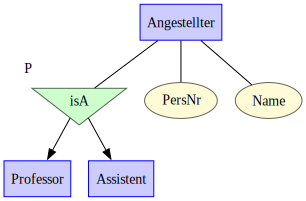

In [15]:
g = ER()

g.add_entity('Angestellter')
g.add_attribute('Angestellter', 'PersNr', is_pk = True)
g.add_attribute('Angestellter', 'Name')

g.add_entity('Professor')
#g.add_attribute('Professor', 'Rang')
#g.add_attribute('Professor', 'Raum')

g.add_entity('Assistent')
#g.add_attribute('Assistent', 'Fachgebiet')

g.add_is_a('Angestellter', ['Professor', 'Assistent'], is_total = False, is_disjunct = True)

#g.draw()
g.display()

---

### Schnellreferenz

Zum Erstellen von ER-Diagrammen, stellen wir die Klasse ERDiagram mit folgendem Interface vor:

```python .noeval
from erdiagram import ER
g = ER()
# ...
g.display()
```

Neue Entität zum Graphen hinzufügen
``` python .noeval
g.add_entity(label, is_multiple = False, is_weak = False)
```

Neues Attribut zu einer Entität im Graphen hinzufügen
``` python .noeval
g.add_attribute( parent_label, attribute_label,
                 is_pk = False, is_multiple = False,
                 is_weak = False, composed_of = [])
``` 
composed_of (=zusammengesetzt aus) erwartet eine Liste von Strings

Neue Beziehung (=Relation) zwischen zwei Entitäten hinzufügen
``` python .noeval
g.add_relation(from_entities, relation_label, to_entities)
``` 

Generalisierung / Spezialisierung beschreiben
``` python .noeval
g.add_is_a(super_class_label, sub_class_labels, 
           is_total, is_disjunct, custom_text = None)
```